In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn import metrics
import random 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV,train_test_split

In [2]:
df = pd.read_excel('BD fact aganist.xlsx')
df[:5]
print(df.shape)

(85, 12)


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df.drop(['Регион'],axis=1)
scaler.fit(X)
X=scaler.transform(X)
X=pd.DataFrame(X)
X[:5]

,0,1,2,3,4,5,6,7,8,9,10
0,0.605457,0.695548,0.251884,0.537317,0.706806,0.000000,0.286571,0.313346,0.513261,0.246425,0.268827
1,0.519912,0.676947,0.490381,0.646028,0.780544,0.365321,0.384615,0.358843,0.442609,0.422992,0.269127
2,0.419063,0.754590,0.485769,0.381809,0.707211,0.000000,0.381855,0.371209,0.629457,0.187569,0.409241
3,0.512168,0.533301,0.249972,0.666667,0.601272,0.000000,0.533301,0.259216,0.637717,0.000000,0.500150
4,0.413901,0.510140,0.298459,0.195824,0.552293,0.096912,0.220449,0.000000,0.378913,0.280528,0.000000


In [4]:
X.index = df['Регион']
X = X.dropna()

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,10
Регион,,,,,,,,,,,
Алтайский край,0.605457,0.695548,0.251884,0.537317,0.706806,0.000000,0.286571,0.313346,0.513261,0.246425,0.268827
Амурская область,0.519912,0.676947,0.490381,0.646028,0.780544,0.365321,0.384615,0.358843,0.442609,0.422992,0.269127
Архангельская область,0.419063,0.754590,0.485769,0.381809,0.707211,0.000000,0.381855,0.371209,0.629457,0.187569,0.409241
Астраханская область,0.512168,0.533301,0.249972,0.666667,0.601272,0.000000,0.533301,0.259216,0.637717,0.000000,0.500150
Белгородская область,0.413901,0.510140,0.298459,0.195824,0.552293,0.096912,0.220449,0.000000,0.378913,0.280528,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика*,0.000000,0.135965,0.089999,0.191985,0.162360,0.190024,0.096004,0.000000,0.000000,0.220022,0.240024
Чувашская Республика - Чувашия,0.526733,0.588504,0.257172,0.411327,0.579894,0.000000,0.102844,0.133224,0.534130,0.157041,0.000000
Чукотский автономный округ,0.204830,0.333253,1.000000,0.799856,0.751725,0.527791,0.933397,0.518432,0.516957,0.611111,0.666667


C:\Users\Meksks\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Meksks\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


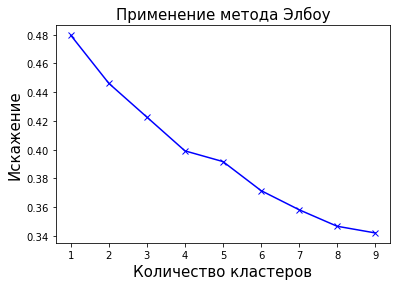

In [6]:
#Elbow method to determine amount of clusters

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров',fontsize=15)
plt.ylabel('Искажение',fontsize=15)
plt.title('Применение метода Элбоу',fontsize=15)
plt.show()

In [7]:
##############################################
#Kmeans for 2 clusters
#here I took unsupervised clustering evaluation metrics:
#https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
# - silhouette_score is higher when clusters are dense and well separated (-1;1)
# - Calinski-Harabasz Index is higher when clusters are dense and well separated
# - lower Davies-Bouldin index relates to a model with better separation between the clusters

kmeans = KMeans(n_clusters=4, init='k-means++').fit(X)
labels = kmeans.labels_

#Kmeans for 4 clusters evaluation

from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

print('silhouette score is:',metrics.silhouette_score(X, labels, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X, labels))
print('davies bouldin score is:',davies_bouldin_score(X, labels))

from collections import Counter
print (Counter(kmeans.labels_))


silhouette score is: 0.10721911886210655
calinski harabasz score is: 12.849747484246224
davies bouldin score is: 1.7298994506033358
Counter({0: 39, 2: 23, 3: 16, 1: 3})


In [8]:
###################################################
#SpectralClustering
from sklearn.cluster import SpectralClustering
clustering_spec = SpectralClustering(n_clusters=4,affinity='nearest_neighbors').fit(X)

print('silhouette score is:',metrics.silhouette_score(X, clustering_spec.labels_, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X, clustering_spec.labels_))
print('davies bouldin score is:',davies_bouldin_score(X, clustering_spec.labels_))

print((Counter(clustering_spec.labels_)))

silhouette score is: 0.08240071048969823
calinski harabasz score is: 10.74378204131663
davies bouldin score is: 1.858285790965664
Counter({0: 27, 3: 19, 1: 19, 2: 16})


Counter({0: 61, -1: 20})
silhouette score is: 0.2476598433276249
calinski harabasz score is: 4.918449850902024
davies bouldin score is: 3.7745444089392914


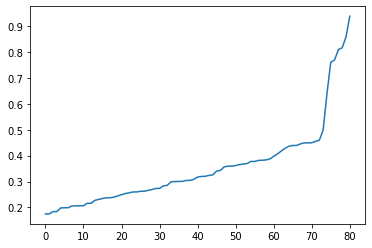

In [9]:
###################################################
#DBSCAN made only 2 clusters

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
#finding optimal epsilon like here: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
neighbors = NearestNeighbors(n_neighbors=24)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#hence optimal epsilon for DBSCAN is roughly 0.44

clustering_dbscan = DBSCAN(eps=0.44, min_samples=15).fit(X)
print(Counter(clustering_dbscan.labels_))

print('silhouette score is:',metrics.silhouette_score(X, clustering_dbscan.labels_, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X, clustering_dbscan.labels_))
print('davies bouldin score is:',davies_bouldin_score(X, clustering_dbscan.labels_))

In [10]:
############################################################
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
clustering_ac = AgglomerativeClustering(n_clusters = 4).fit(X)
print(Counter(clustering_ac.labels_))

print('silhouette score is:',metrics.silhouette_score(X, clustering_ac.labels_, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X, clustering_ac.labels_))
print('davies bouldin score is:',davies_bouldin_score(X, clustering_ac.labels_))

Counter({2: 32, 0: 29, 3: 17, 1: 3})
silhouette score is: 0.10639414818784465
calinski harabasz score is: 12.315323008357176
davies bouldin score is: 1.7280749599564267


In [11]:
labels = clustering_dbscan.labels_

silhouette score is: 0.27942202645366854
calinski harabasz score is: 13.505841273375577
davies bouldin score is: 2.059712115968354


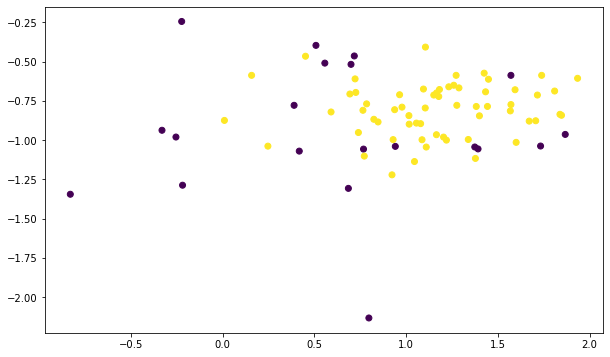

In [12]:
#Random projection
from sklearn.random_projection import SparseRandomProjection
transformer = SparseRandomProjection(n_components=2)
import pylab
X_new = transformer.fit_transform(X)
pylab.figure(figsize=(10,6))
pylab.scatter(X_new[:,0],X_new[:,1],c=labels)

print('silhouette score is:',metrics.silhouette_score(X_new, labels, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X_new, labels))
print('davies bouldin score is:',davies_bouldin_score(X_new, labels))

[0.28076921 0.17402862]
silhouette score is: 0.3030652712728209
calinski harabasz score is: 10.017353542768921
davies bouldin score is: 2.461931244304305


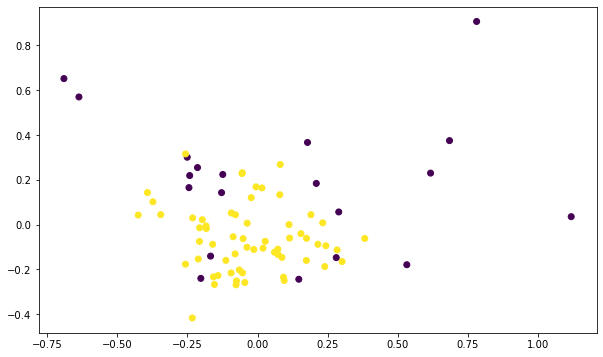

In [13]:
#PCA (2 dims explain 45% of variance)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pylab.figure(figsize=(10,6))
pylab.scatter(X_pca[:,0],X_pca[:,1],c=labels)
print(pca.fit(X).explained_variance_ratio_)

print('silhouette score is:',metrics.silhouette_score(X_pca, labels, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X_pca, labels))
print('davies bouldin score is:',davies_bouldin_score(X_pca, labels))

silhouette score is: 0.2956338227059679
calinski harabasz score is: 0.6489298614579692
davies bouldin score is: 10.296547641630069


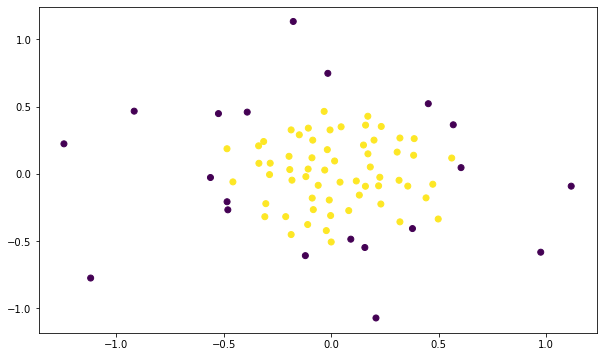

In [14]:
#MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)
mds_f = mds.fit(X)
pylab.figure(figsize=(10,6))
pylab.scatter(X_mds[:,0],X_mds[:,1],c=labels)
#print(mds_f.stress_)
#print(mds_f.dissimilarity_matrix_)

print('silhouette score is:',metrics.silhouette_score(X_mds, labels, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X_mds, labels))
print('davies bouldin score is:',davies_bouldin_score(X_mds, labels))

silhouette score is: 0.18123496
calinski harabasz score is: 1.6231197297746494
davies bouldin score is: 6.337420931483398


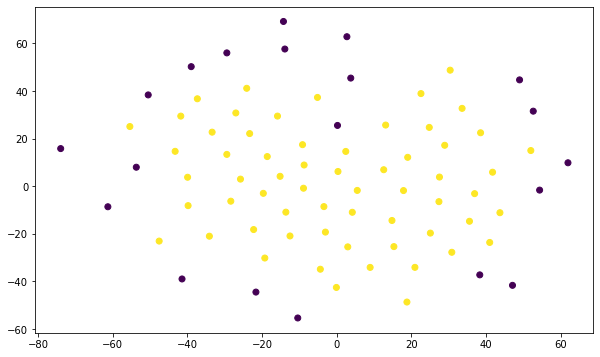

In [15]:
#tSNE (init - pca)
from sklearn.manifold import TSNE
X_tsne= TSNE(n_components=2,init = 'pca').fit_transform(X)

pylab.figure(figsize=(10,6))
pylab.scatter(X_tsne[:,0],X_tsne[:,1],c=labels)

print('silhouette score is:',metrics.silhouette_score(X_tsne, labels, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X_tsne, labels))
print('davies bouldin score is:',davies_bouldin_score(X_tsne, labels))

silhouette score is: 0.17878011
calinski harabasz score is: 0.8831852894403539
davies bouldin score is: 8.757743633685273


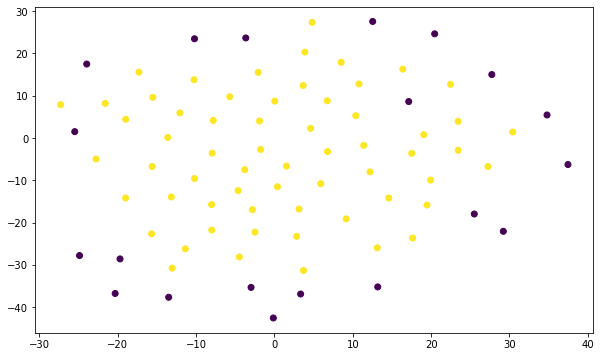

In [16]:
#tSNE (init - random(default))
from sklearn.manifold import TSNE
X_tsne= TSNE(n_components=2).fit_transform(X) 
pylab.figure(figsize=(10,6))
pylab.scatter(X_tsne[:,0],X_tsne[:,1],c=labels)

print('silhouette score is:',metrics.silhouette_score(X_tsne, labels, metric='euclidean'))
print('calinski harabasz score is:',metrics.calinski_harabasz_score(X_tsne, labels))
print('davies bouldin score is:',davies_bouldin_score(X_tsne, labels))

In [17]:
X_mds = pd.DataFrame(X_mds)
X_mds.index = X.index
labels = pd.DataFrame(labels)
labels.index = X.index

In [18]:
new_df = pd.concat([X_mds, labels], axis = 1)
new_df.columns = ['1 компонента', '2 компонента', 'Кластер']

new_df[:5]

,1 компонента,2 компонента,Кластер
Регион,,,
Алтайский край,-0.182883,-0.047105,0
Амурская область,-0.481323,-0.267740,-1
Архангельская область,-0.186748,0.326896,0
Астраханская область,-0.485234,0.186808,0
Белгородская область,0.441048,-0.178845,0


In [20]:
new_df.to_excel("кластеры 2021.xlsx")  